In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from catboost import CatBoostRegressor  # regression model
from joblib import dump  # saving the model
from matplotlib.markers import MarkerStyle  # data plotting
from sklearn.metrics import mean_absolute_error  # accuracy metrics
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
)
from sklearn.model_selection import train_test_split  # splitting the dataset

In [2]:
df = pd.read_csv("IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

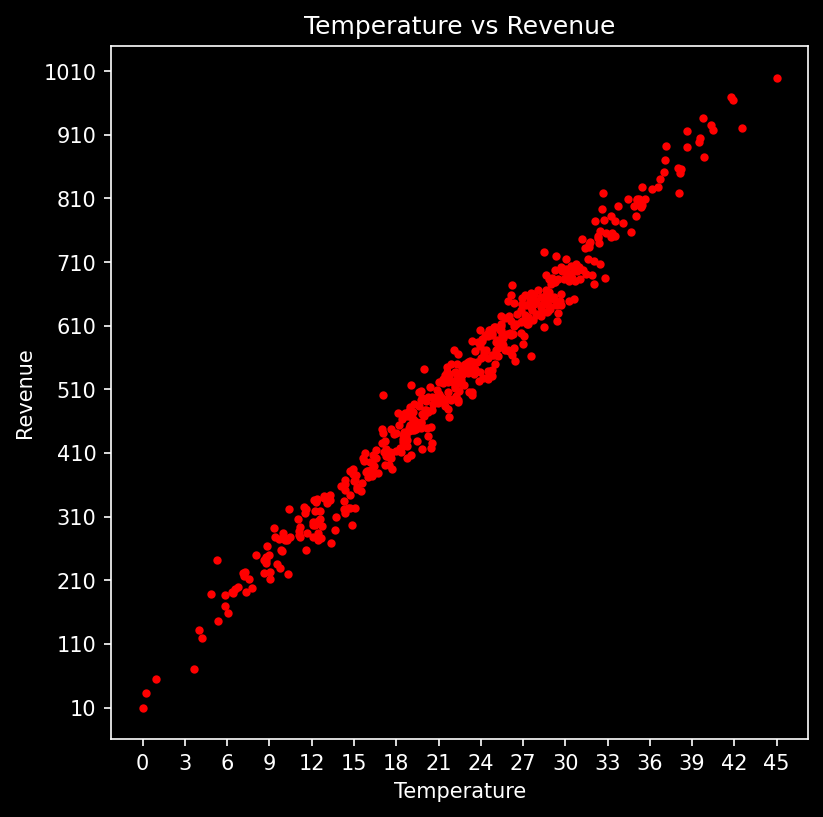

In [4]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Temperature = df["Temperature"]
Revenue = df["Revenue"]
plt.scatter(Temperature, Revenue, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Temperature_vs_Revenue.png", bbox_inches="tight")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [6]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)

Learning rate set to 0.03609
0:	learn: 171.5575790	total: 59.6ms	remaining: 59.6s
1:	learn: 166.3315074	total: 60ms	remaining: 30s
2:	learn: 161.2378901	total: 60.4ms	remaining: 20.1s
3:	learn: 156.2562187	total: 60.8ms	remaining: 15.1s
4:	learn: 151.4742489	total: 61.1ms	remaining: 12.2s
5:	learn: 146.7460350	total: 61.5ms	remaining: 10.2s
6:	learn: 142.3744463	total: 61.9ms	remaining: 8.78s
7:	learn: 138.1327944	total: 62.3ms	remaining: 7.72s
8:	learn: 133.8921319	total: 62.7ms	remaining: 6.9s
9:	learn: 129.9350458	total: 63ms	remaining: 6.24s
10:	learn: 125.9754810	total: 63.4ms	remaining: 5.7s
11:	learn: 122.2519941	total: 63.8ms	remaining: 5.25s
12:	learn: 118.7965074	total: 64ms	remaining: 4.86s
13:	learn: 115.1968743	total: 64.4ms	remaining: 4.53s
14:	learn: 111.8598767	total: 64.7ms	remaining: 4.25s
15:	learn: 108.6493545	total: 65.1ms	remaining: 4s
16:	learn: 105.5203722	total: 65.5ms	remaining: 3.79s
17:	learn: 102.4442356	total: 65.8ms	remaining: 3.59s
18:	learn: 99.5190498	

In [7]:
print("The coefficient of determination :", r2_score(y_test, y_pred))
adjusted_r2_score = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9776880692048099
The adjusted coefficient of determination : 0.9772232373132435


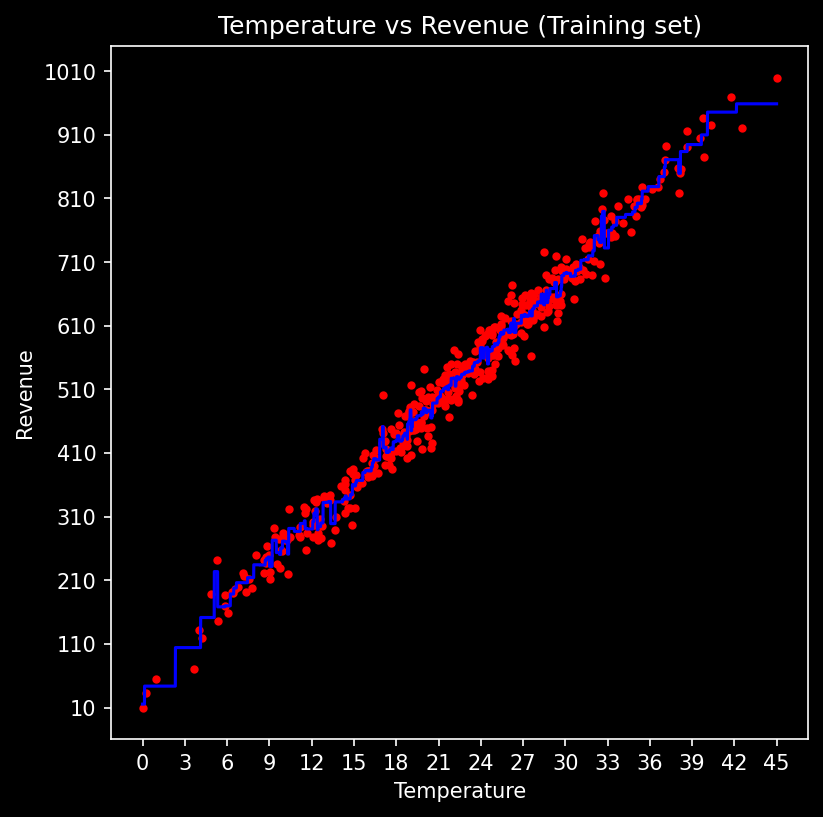

In [8]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_train_grid = np.arange(min(X_train), max(X_train), 0.01)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=MarkerStyle("."), color="red")
plt.plot(X_train_grid, cbr.predict(X_train_grid), color="blue")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Training set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Training_set.png", bbox_inches="tight")

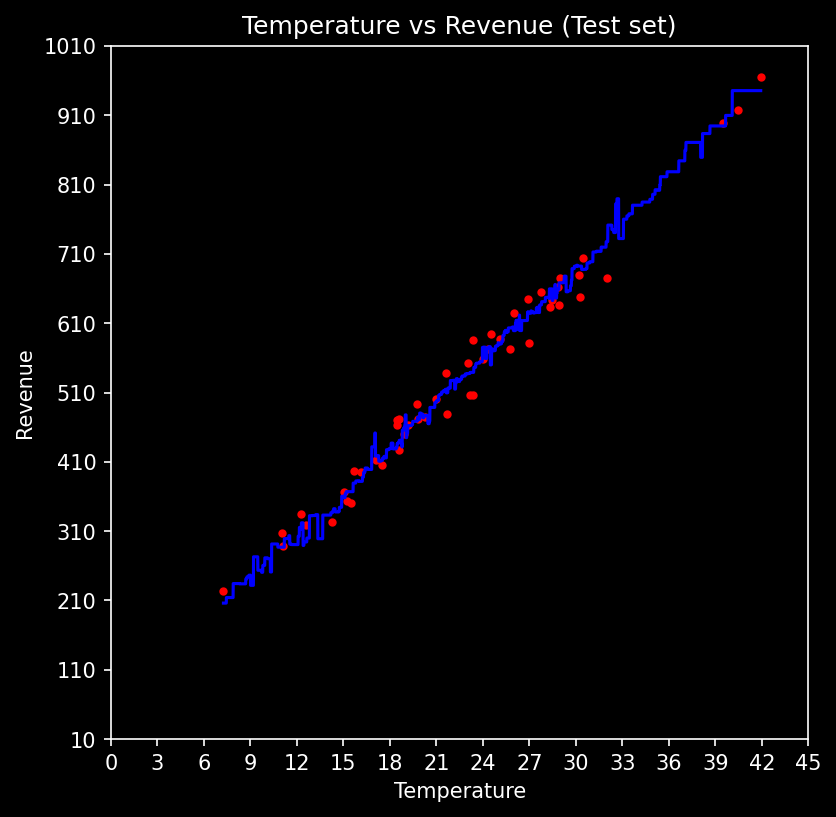

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_test_grid = np.arange(min(X_test), max(X_test), 0.01)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=MarkerStyle("."), color="red")
plt.plot(X_test_grid, cbr.predict(X_test_grid), color="blue")
plt.xticks(np.arange(0, 48, 3))
plt.yticks(np.arange(10, 1100, 100))
plt.title("Temperature vs Revenue (Test set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.savefig("Images/Test_set.png", bbox_inches="tight")

In [10]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error (RMSE) :",
    mean_squared_error(y_test, y_pred, squared=False),
)
print("Mean Squared Log Error (MSLE) :", mean_squared_log_error(y_test, y_pred))
print(
    "Root Mean Squared Log Error (RMSLE) :",
    mean_squared_log_error(y_test, y_pred, squared=False),
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),
)

Mean Absolute Error (MAE) : 19.44556932090203
Mean Squared Error (MSE) : 545.5258543041713
Root Mean Squared Error (RMSE) : 23.356494906217655
Mean Squared Log Error (MSLE) : 0.0021143654427702666
Root Mean Squared Log Error (RMSLE) : 0.045982229641137094
Mean Absolute Percentage Error (MAPE) : 0.038461729693872


In [11]:
dump(cbr, "catBoostingRegressor.joblib")

['catBoostingRegressor.joblib']